# Problem Defination:

### Want to predict if the client will subscribe to term deposit or not.  

# Hypothesis Generation:

Let's notedown all the important variables that will affect our outcome without looking at our dataset:
1. Income - As more will be the income of the customer more likely to subscribe for term deposite.
2. Job_Type - As more stable will be the job more likely to subscribe for term deposite.
3. Education - As more educated is directly proportional to the awareness of term plans.
4. Balance - As a person with more bank balance is likely to invest money for a certain time period.
5. Age - As the person with more age is likely to have stable income.
6. Dependents - As more will be dependents/children less likely to be investing money.
7. loan - If person is already having one or two loan then less likely to invest money.
8. Maritial_Status - If a person is maried then it is more likely have a second source of income and invest money.

# Data Extraction / Collection:

As we are already provide with the train and test dataset so we will be using the same to train and test our model.
By looking at the dataset, there are some more variable which are essential for the prediction and would result in better prediction such as duration, contact, campaign, previous and poutcome. So, we will be adding them to our list of hypothesis.

# Data Exploration and Transformation:

### Reading the Data:

Let's start by importing the required libraries and loading the train and test datasets

In [52]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
# loading the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

### Variable Identification:

Now, let's explore our datasets by looking at the columns in both train and test dataset

In [54]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [55]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

By looking at the columns of train and test dataset it can be infered that subscribed is the target variable as it is not present in the test dataset. And as the target variable is present in train dataset so it is a Supervised Learning Problem. 

Let's look at the shape of the dataset.

In [56]:
train.shape

(31647, 18)

In [57]:
test.shape

(13564, 17)

As we can see there are 18 columns in train dataset and 17 in the test dataset. So, the missing one in test is "subscribed", which we have to predict and if look at the number of rows then the train dataset is pretty big as compared to test so it will result in better prediction.

Now, let's look at the variables category how many of them are continous and how many of them are categorical.

In [58]:
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

We can see that there are 10 object(categorical) variables and 8 int64(continuous) variables and as target variable "subscribed" is a categorical variable so this is a Classification Problem.

Now, let's see the few rows of our dataset

In [59]:
#printing first five rows of the dataset
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


As we can see that all the categorical variables are string type so we have to perform dummification to convert them to numeric type as sklearn does not allow character or string type values. But this can be done later before it we have to perform univariate and bivariate analysis of variables.

### Univariate Analysis:

Now Let's look at the distribution of our target variable, i.e. subscribed. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

In [60]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [61]:
# Normalize can be set to True to print proportions instead of number 
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

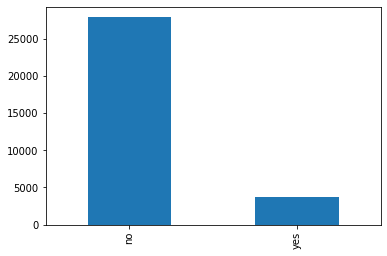

In [62]:
# plotting the bar plot of frequencies
train['subscribed'].value_counts().plot.bar()

So, by seeing frequency table, percentage distribution and barplot we come to know that only 3715 people have subscribed out of 31674 which is around the 12% of dataset. Actually it is very low but for the banks it is an decent rate of success.

Now, lets look at other variables in the dataset and perform there univariate analysis.
First, let's look at the age variable and see which age category people are addressed more.

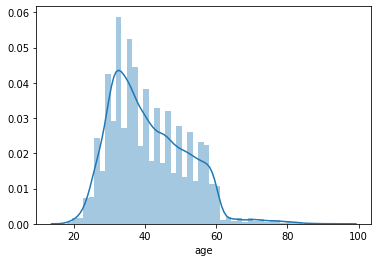

In [63]:
sns.distplot(train["age"])

As we can see that people below the age of 20 and above the age of 60 are not likely to do term deposite as the don't have stable source of income if they are below 20 and above 60 ones if they are getting pension then there some chances otherwise no.

We can also see that people between 30-40 are highest potential customers as this is the time where people think of future investments. Hence, this becomes an important variable for predicting our target variable.

Now let's look at what are the different types of jobs of the clients. As job is a categorical variable, we will look at its barplot.

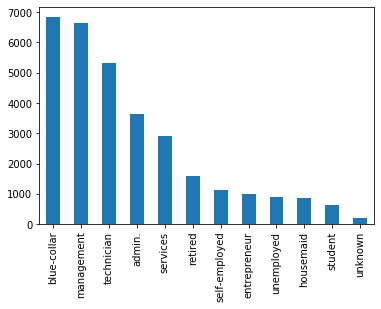

In [64]:
train['job'].value_counts().plot.bar()

As we can see that the people in blue collar jobs and management job are more likely have bank account and are the potential customers, where as students does'nt have bank accounts and even though they have then also there no chance for term deposite.
Hence this also become an important variable for target variable predicion.

Now let's look how many of marital people have bank accounts, As marital is a categorical variable, we will look at its barplot.

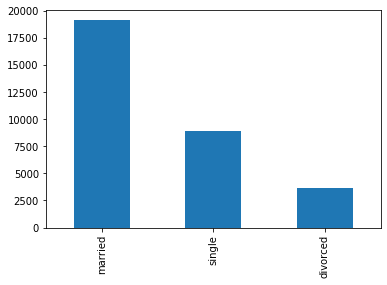

In [65]:
train['marital'].value_counts().plot.bar()

As we can see that people who are maried are having the most bank accounts and they are also the potential customers.
So, this also becomes an important feature for prediction.

Now, lets see what education says about trend. As education is a categorical variable, we will look at its barplot.

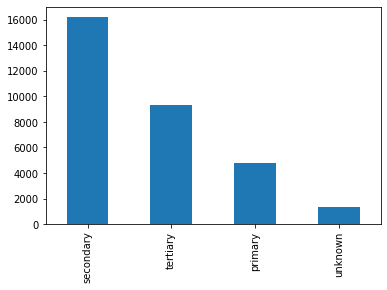

In [66]:
train['education'].value_counts().plot.bar()

As we can see that people with secondary education are having more bank accounts but people with tertiary are less and as we know people with more education are likely to be potential customers.

Now, lets see how many customer have default history. As default is a categorical variable, we will look at its barplot.

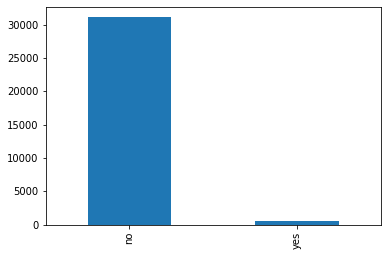

In [67]:
train['default'].value_counts().plot.bar()

As we can see most of customers are not defaulty, which is a good sign as being default have no chance for term deposite and hence, it becomes an important feature for target value prediction.

Now, let's look at balance , as it is a continous variable we will look at its distplot.

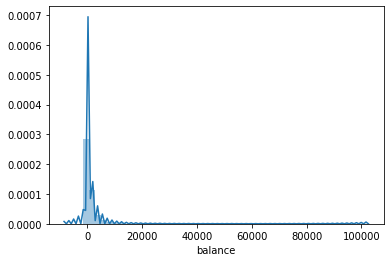

In [68]:
sns.distplot(train["balance"])

Here we can not inference any thing from the balance variable, very few people are having bank balance more than 10k.

Now, let's look at the housing loan, As housing is a categorical variable, we will look at its barplot.

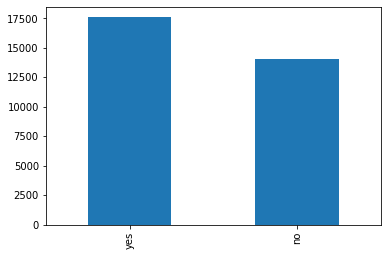

In [69]:
train['housing'].value_counts().plot.bar()

we can see that we have around 44% of customers which do not have housing loan. So there is high chance of term investment. Hence this becomes important feature for target value prediction.

Now, let's see personal loan, As loan  is a categorical variable, we will look at its barplot.

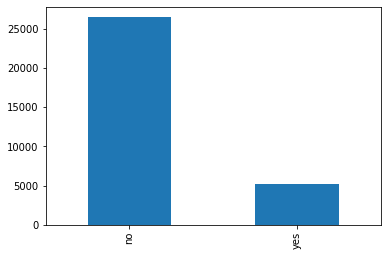

In [70]:
train['loan'].value_counts().plot.bar()

we can see that around 84% of customers do not have any personal loan. So, there is high chance of potential customers for term investment. Hence this becomes important feature for target value prediction.

Now, lets see duration, As it a continous variable, we will look at its displot.

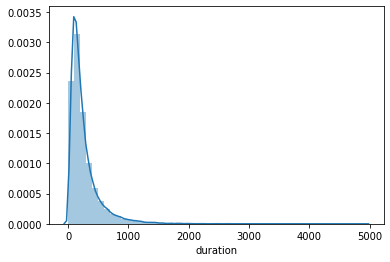

In [71]:
sns.distplot(train["duration"])

we can see that very few customers had contact duration greater than 1000 sec, as contact duration is directly proportional to customers intrest in term investment schemes. Hence this also a important feature in target value prediction.

Here we have done univariate analysis of the important variables and seen there relevance.

Next, We will be performaing bivariate analysis on the features to know there association/relationship with each other.

### Bivariate Analysis:

Now we will explore these variables against the target variable using bivariate analysis. We will make use of scatter plots for continuous-continous variables, Barplot for continous-categorical variables and crosstabs for the categorical-categorical variables. 

Let's start with age and subscribed variable it is continous-categorical variables we will use Barplot.

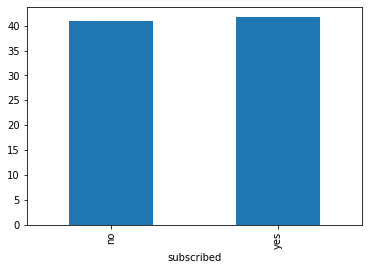

In [72]:
train.groupby("subscribed")["age"].mean().plot.bar()

As we can see that there is no significant diffrence between mean age of people who have subscribed and not subscribed. So age does give any trend for target value prediction.

Now, let's see job and subscribed variable it is categorical-categorical variables we will use crosstab.

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0, 0.5, 'Percentage')

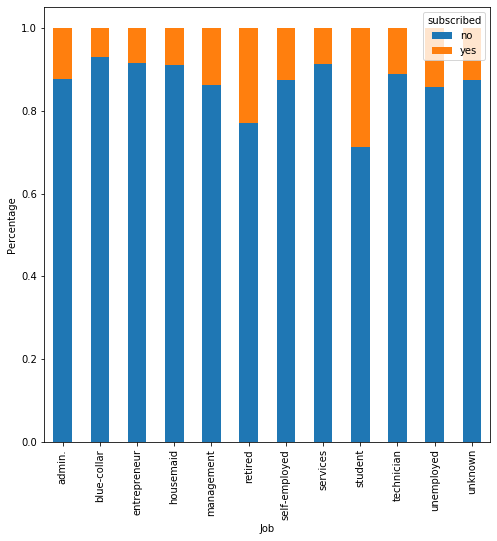

In [73]:
job=pd.crosstab(train['job'],train['subscribed'])
print(job)
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

From the above graph we can infer that students and retired people have higher chances of subscribing to a term deposit, which is surprising as students generally do not subscribe to a term deposit. The possible reason is that the number of students in the dataset is less and comparatively to other job types, more students have subscribed to a term deposit.

Now, let's see marital and subscribed variable it is categorical-categorical variables we will use crosstab.

subscribed     no   yes
marital                
divorced     3185   445
married     17176  1919
single       7571  1351


Text(0, 0.5, 'Percentage')

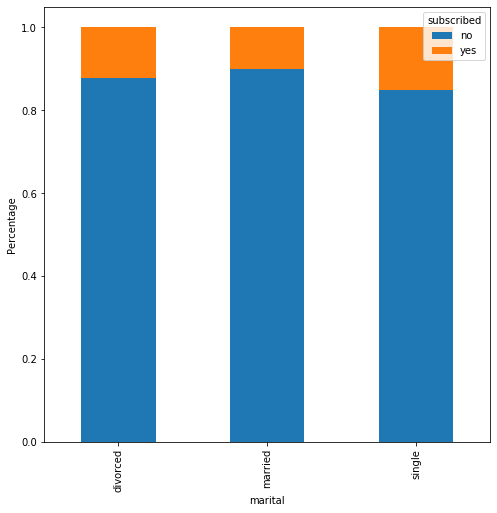

In [74]:
marital=pd.crosstab(train['marital'],train['subscribed'])
print(marital)
marital.div(marital.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('marital')
plt.ylabel('Percentage')

From the above graph we can infer that single and divorced people have higher chances of subscribing to a term deposit. The possible reason is that the number of single and divorced in the dataset is less and comparatively to other maried one, more singles and divorced have subscribed to a term deposit.

Now, let's see education and subscribed variable it is categorical-categorical variables we will use crosstab.

subscribed     no   yes
education              
primary      4381   427
secondary   14527  1697
tertiary     7886  1415
unknown      1138   176


Text(0, 0.5, 'Percentage')

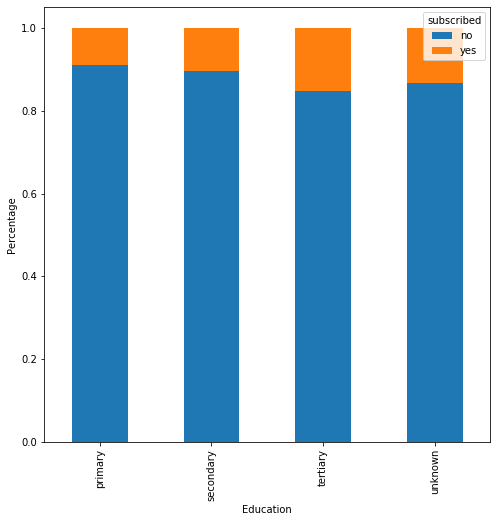

In [75]:
edu=pd.crosstab(train['education'],train['subscribed'])
print(edu)
edu.div(edu.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Education')
plt.ylabel('Percentage')

From the above graph we can infer that tertiary level people subscribed more to the term insurance plan and this is preety obvious ans if see other levels also decent number of subscriber.

Now, let's see default and subscribed variable it is categorical-categorical variables we will use crosstab.

subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'Percentage')

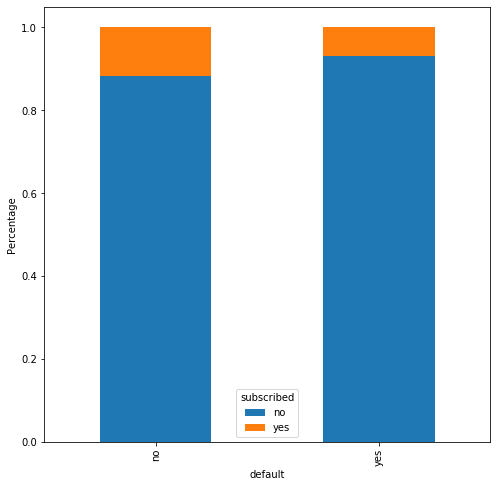

In [76]:
default=pd.crosstab(train['default'],train['subscribed'])
print(default)
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('default')
plt.ylabel('Percentage')

We can infer that clients having no previous default have slightly higher chances of subscribing to a term loan as compared to the clients who have previous default history.

Now, let's see balance and subscribed variable it is continous-categorical variables we will use Barplot.

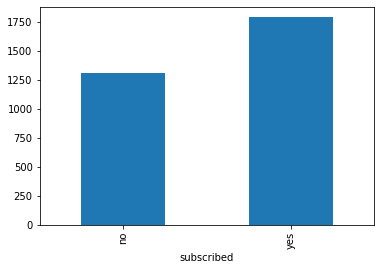

In [77]:
train.groupby("subscribed")["balance"].mean().plot.bar()

we can infer that clients having more balance are likely to subscribe.

Now, let's see housing and subscribed variable it is categorical-categorical variables we will use crosstab.

subscribed     no   yes
housing                
no          11698  2365
yes         16234  1350


Text(0, 0.5, 'Percentage')

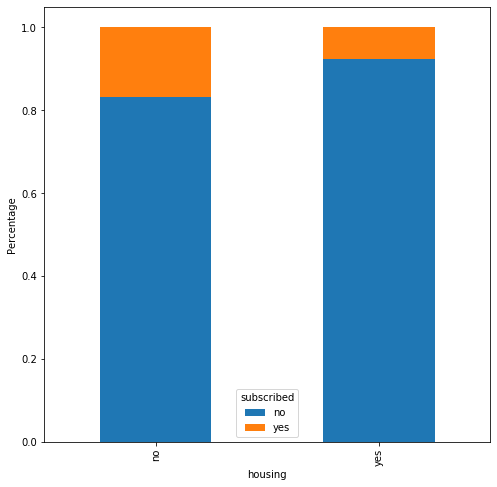

In [78]:
housing=pd.crosstab(train['housing'],train['subscribed'])
print(housing)
housing.div(housing.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('housing')
plt.ylabel('Percentage')

we can infer that people who does not have housing loan are more likely to subscribe for term investment.

Now, let's see loan and subscribed variable it is categorical-categorical variables we will use crosstab.

subscribed     no   yes
loan                   
no          23132  3384
yes          4800   331


Text(0, 0.5, 'Percentage')

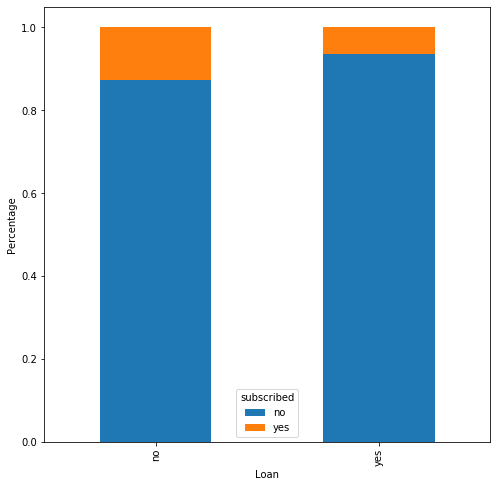

In [79]:
loan=pd.crosstab(train['loan'],train['subscribed'])
print(loan)
loan.div(loan.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Loan')
plt.ylabel('Percentage')

we can infer that people who does not have personal loan are more likely to subscribe for term investment.

Now, let's see duration and subscribed variable it is continous-categorical variables we will use Barplot.

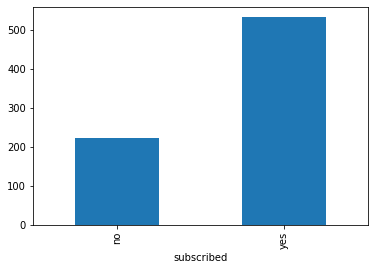

In [80]:
train.groupby("subscribed")["duration"].mean().plot.bar()

we can infer that clients having more call duration are likely to subscribe.

Let's now look at how correlated our numerical variables are. We will see the correlation between each of these variables and the variable which have high negative or positive values are correlated. By this we can get an overview of the variables which might affect our target variable. We will convert our target variable into numeric values first.

In [81]:
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

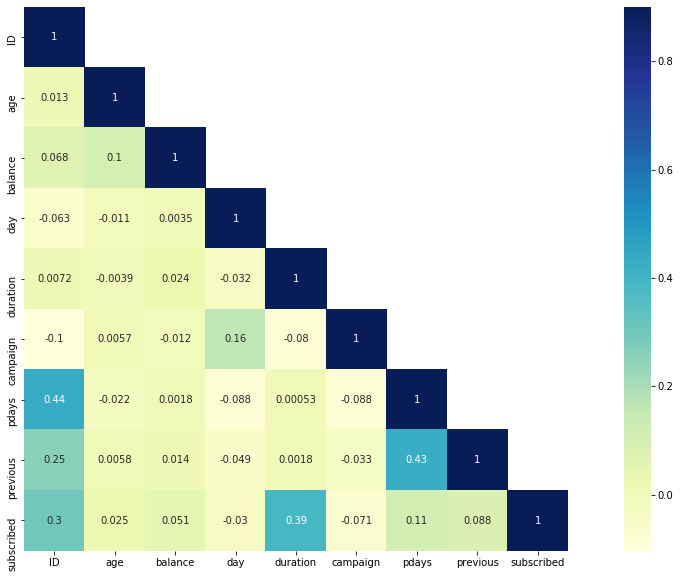

In [82]:
corr = train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

We can infer that duration of the call and pdays is highly correlated with the target variable. This can be verified as well. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

Next we will look for any missing values in the dataset.

### Treating Missing Values:

In [83]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

There are no missing values in the train dataset. 

Now, we will see for test dataset

In [84]:
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

There are no missing values in the test dataset too.

Next, we will look for any outliers in the dataset.

### Outlier Detection and Treatment:

First lets look at age variable. As it is continous we will use boxplot

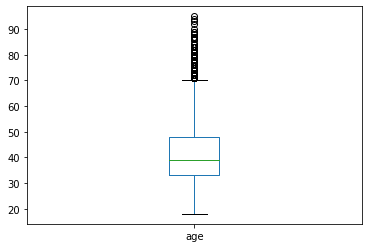

In [85]:
train["age"].plot.box()

As we can see there are many people above age 70 but they are not the outliers as it is practically possible to have age upto 100. So, here we do not need to treat them.

Now, lets look at the duration.  As it is continous variable we will use boxplot.

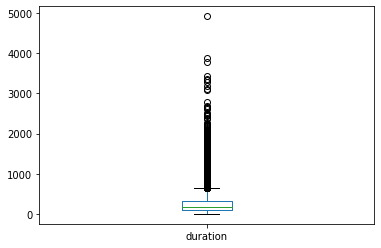

In [86]:
train["duration"].plot.box()

As we can see there are many people above 1000 sec of contact duration but they not outliers as there is no time limit to the call duration and more the customer interacts more likely he/she may subscribe.

Next, we will be looking at variable transformation.

### Variable Transformation:

while doing bivariate analysis we seen the right skewness in the balance and duration variable, let's see if it would help by transforming them.

First let's see balance variable

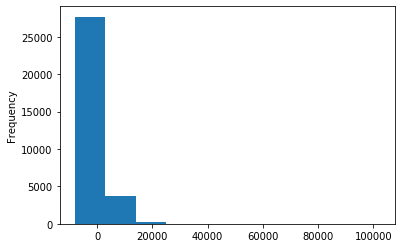

In [87]:
# Before Transformation
train["balance"].plot.hist()

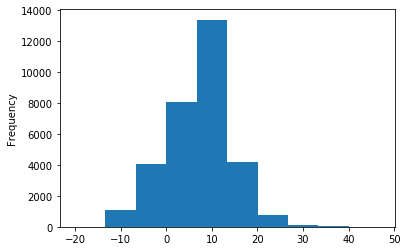

In [88]:
# After Transformation
np.cbrt(train["balance"]).plot.hist()

As we can see now the balance variable skewness has been removed, here we have taken cube root because it contains positive and Negetive value both.

Let's Make it permanent in train and same for test also.

In [89]:
train["balance"] = np.cbrt(train["balance"])
test["balance"] = np.cbrt(test["balance"])

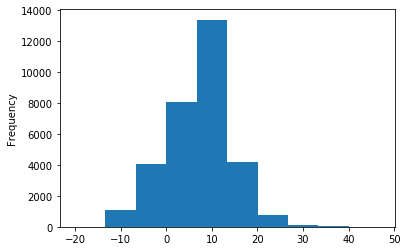

In [90]:
train["balance"].plot.hist()

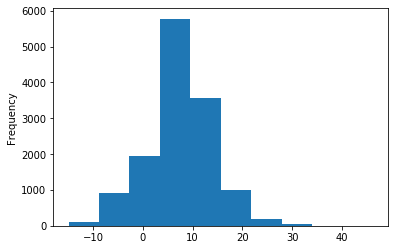

In [91]:
test["balance"].plot.hist()

Now, let's move to duration variable

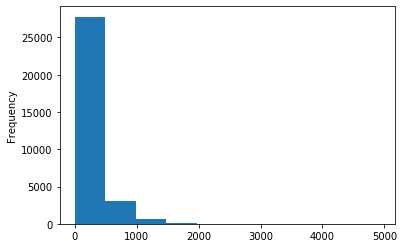

In [92]:
# Before Transformation
train["duration"].plot.hist()

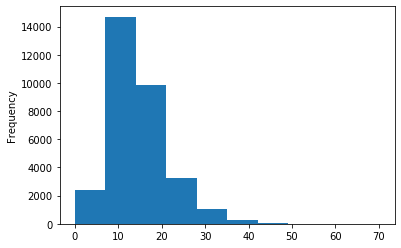

In [93]:
# After Transformation
np.sqrt(train["duration"]).plot.hist()

As we can see now the duration variable skewness has been removed, here we have taken square root because it contains only positive values.

Let's Make it permanent in train and same for test also.

In [94]:
train["duration"] = np.sqrt(train["duration"])
test["duration"] = np.sqrt(test["duration"])

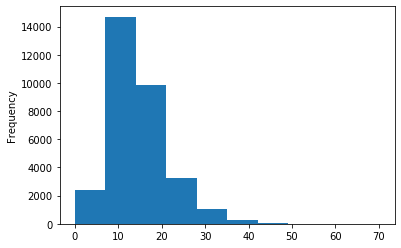

In [96]:
train["duration"].plot.hist()

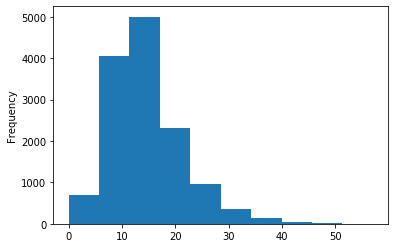

In [97]:
test["duration"].plot.hist()

Next, we will start to build our predictive model to predict whether a client will subscribe to a term deposit or not.

# Model Building:

As the sklearn models takes only numerical input, we will convert the categorical variables into numerical values using dummies. We will remove the ID variables as they are unique values and then apply dummies. We will also remove the target variable and keep it in a separate variable.

In [99]:
train = train.drop("ID",axis=1)
test = test.drop("ID",axis=1)

In [100]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,12.456918,no,no,telephone,19,nov,6.633250,2,-1,0,unknown,0
1,31,unknown,married,secondary,no,1.442250,no,no,cellular,20,jul,9.539392,2,-1,0,unknown,0
2,27,services,married,secondary,no,9.622603,yes,no,cellular,18,jul,15.491933,1,-1,0,unknown,0
3,57,management,divorced,tertiary,no,14.868480,no,no,cellular,22,jun,29.444864,1,84,3,success,1
4,31,technician,married,secondary,no,4.918685,yes,no,cellular,4,feb,19.493589,1,-1,0,unknown,0


In [102]:
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,services,married,secondary,no,4.904868,yes,no,cellular,15,may,4.472136,6,-1,0,unknown
1,78,retired,divorced,primary,no,14.072751,no,no,telephone,1,jul,19.287302,1,-1,0,unknown
2,31,self-employed,single,tertiary,no,5.241483,yes,no,unknown,16,may,26.000000,1,-1,0,unknown
3,57,services,single,primary,no,15.573360,yes,no,telephone,13,may,8.062258,2,-1,0,unknown
4,45,blue-collar,divorced,secondary,no,-8.900130,no,yes,unknown,3,jul,10.535654,1,-1,0,unknown


In [103]:
# Seprating target Variable from train dataset
target = train["subscribed"]
train = train.drop('subscribed',axis=1)

In [105]:
# applying dummies on the train dataset
train = pd.get_dummies(train)

In [106]:
train.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,56,12.456918,19,6.633250,2,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,31,1.442250,20,9.539392,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,27,9.622603,18,15.491933,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,57,14.868480,22,29.444864,1,84,3,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,31,4.918685,4,19.493589,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [107]:
# applying dummies on the test dataset
test = pd.get_dummies(test)

In [108]:
test.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,32,4.904868,15,4.472136,6,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,78,14.072751,1,19.287302,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,31,5.241483,16,26.000000,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,57,15.573360,13,8.062258,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,45,-8.900130,3,10.535654,1,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


Now as you can see after applying dummies the number of columns has incresed upto 51 from 17 because every categorical variable is converted to continous individually.

Now, its time to build our model. We will split the train data into training and validation set so that we will be able to validate the results of our model on the validation set. We will keep 20% data as validation set and rest as the training set. 

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
# splitting into train and validation with 20% data in validation set and 80% data in train set.
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.2, random_state=12)

Now our data is ready. Its time to build our model and check its performance. 

As it is an classification problem we can use logistic regression if our data is linear and decision trees if data is non linear we try on both the classifiers.

Let's first build a Logistic Regression model.

### Logistic Regression:

In [111]:
from sklearn.linear_model import LogisticRegression

In [115]:
# defining the logistic regression model
lreg = LogisticRegression(solver='liblinear')

In [116]:
lreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
# making prediction on the validation set
prediction = lreg.predict(X_val)

Now we will evaluate how accurate our predictions are. As the evaluation metric for this problem is accuracy, let's calculate the accuracy on validation set.

In [118]:
from sklearn.metrics import accuracy_score

In [119]:
# calculating the accuracy score
accuracy_score(y_val, prediction)

0.8996840442338072

We got an accuracy score of around 90% on the validation dataset.

Now, let's check if our dataset is non-linear using decision tree algorithm

### Decision Tree

In [120]:
from sklearn.tree import DecisionTreeClassifier

In [121]:
# defining the decision tree model with depth of 4, you can tune it further to improve the accuracy score
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [122]:
# fitting the decision tree model
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [123]:
# making prediction on the validation set
predict = clf.predict(X_val)

In [124]:
# calculating the accuracy score
accuracy_score(y_val, predict)

0.8951026856240126

We got an accuracy of similar to logistic regression but slightly less than that of logistic regression on the validation set. 

So, we will be using logistic regression for prediction on test dataset as we have already transformed test dataset before so lets predict.

### Predicting on test dataset and Saving into csv file:

In [125]:
test_prediction = clf.predict(test)

Finally, we will save these predictions into a csv file.

In [126]:
submission = pd.DataFrame()

In [127]:
submission['subscribed'] = test_prediction

Since the target variable is yes or no, we will convert 1 and 0 in the predictions to yes and no respectively.

In [128]:
submission['subscribed'].replace(0,'no',inplace=True)
submission['subscribed'].replace(1,'yes',inplace=True)

In [129]:
submission.to_csv('submission.csv', header=True, index=False)

Now, we will copy the values in the subscribed column and paste them in the subscribed column of solution_checker.xlsx file.
And, we will see the accuracy of the model on test dataset under Your accuracy score column.